In [1]:
from keras.datasets import imdb
from keras.models import load_model

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(y_train.shape)

(25000,)
(25000,)


In [3]:
print(y_train)

[1 0 0 ... 0 1 0]


In [4]:
from keras import preprocessing
max_len = 20
x_train = preprocessing.sequence.pad_sequences(x_train,max_len)
x_test = preprocessing.sequence.pad_sequences(x_test,max_len)

In [5]:
print(x_train.shape)


(25000, 20)


In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout
model = Sequential()
model.add(Embedding(10000,8,input_length = 20))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               82432     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 162,945
Trainable params: 162,945
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train,y_train,epochs = 10, batch_size = 32, validation_data = (x_val,y_val))
model.save("code_1.h5")

C:\Users\divya\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 1000 samples
Epoch 1/10
25000/25000 [==============================] - 7s 296us/step - loss: 0.5631 - acc: 0.6936 - val_loss: 0.4370 - val_acc: 0.7810
Epoch 2/10
25000/25000 [==============================] - 5s 199us/step - loss: 0.4362 - acc: 0.7954 - val_loss: 0.3840 - val_acc: 0.8200
Epoch 3/10
25000/25000 [==============================] - 5s 190us/step - loss: 0.3872 - acc: 0.8249 - val_loss: 0.3445 - val_acc: 0.8520
Epoch 4/10
25000/25000 [==============================] - 5s 190us/step - loss: 0.3443 - acc: 0.8516 - val_loss: 0.3006 - val_acc: 0.8780
Epoch 5/10
25000/25000 [==============================] - 5s 197us/step - loss: 0.3016 - acc: 0.8751 - val_loss: 0.2478 - val_acc: 0.9000
Epoch 6/10
25000/25000 [==============================] - 5s 202us/step - loss: 0.2610 - acc: 0.8935 - val_loss: 0.2128 - val_acc: 0.9240
Epoch 7/10
25000/25000 [==============================] - 5s 199us/step - loss: 0.2236 - acc: 0.9139 - val_loss: 0.1734 - v

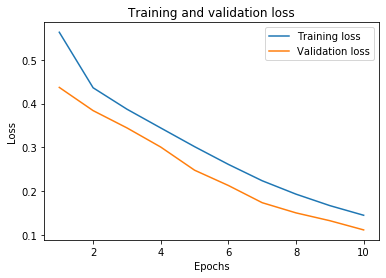

In [9]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

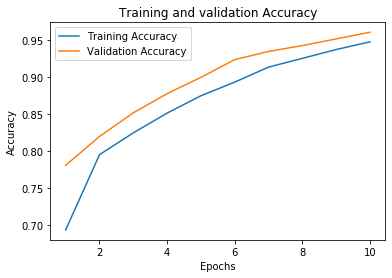

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
result =model.evaluate(x_test,y_test)
print(result)

25000/25000 [==============================] - 2s 65us/step
[0.9007700750923157, 0.7129600048065186]


In [12]:
history = model.fit(x_train,y_train,epochs = 10, batch_size = 32, validation_data = (x_val,y_val))

Train on 25000 samples, validate on 1000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 184us/step - loss: 0.1262 - acc: 0.9552 - val_loss: 0.0938 - val_acc: 0.9680
Epoch 2/10
25000/25000 [==============================] - 2s 70us/step - loss: 0.1086 - acc: 0.9622 - val_loss: 0.0849 - val_acc: 0.9730
Epoch 3/10
25000/25000 [==============================] - 2s 73us/step - loss: 0.0939 - acc: 0.9678 - val_loss: 0.0598 - val_acc: 0.9800
Epoch 4/10
25000/25000 [==============================] - 2s 61us/step - loss: 0.0813 - acc: 0.9732 - val_loss: 0.0558 - val_acc: 0.9840
Epoch 5/10
25000/25000 [==============================] - 2s 62us/step - loss: 0.0692 - acc: 0.9779 - val_loss: 0.0443 - val_acc: 0.9890
Epoch 6/10
25000/25000 [==============================] - 2s 60us/step - loss: 0.0604 - acc: 0.9810 - val_loss: 0.0391 - val_acc: 0.9890
Epoch 7/10
25000/25000 [==============================] - 2s 64us/step - loss: 0.0506 - acc: 0.9846 - val_loss: 0.0368 - val_acc

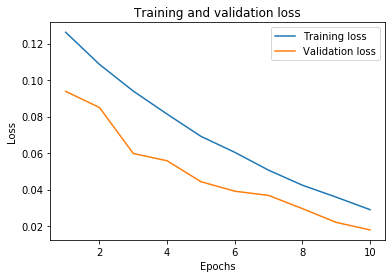

In [13]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

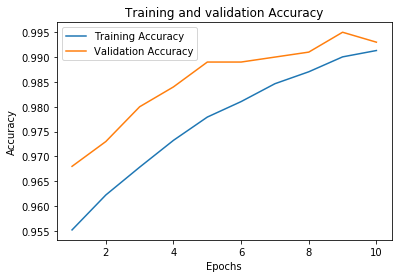

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()